<a href="https://colab.research.google.com/github/CamiWeingartner/alura-imersao-dev-jan-2026/blob/master/Imers%C3%A3o_dados_com_Python_Alura_(01_2026).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 - Análise de dados com Pandas


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# traduza todas as colunas do dataframe para português brasileiro
mapeamento_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

"""mapeamento_colunas = {
    'ano_trabalho': 'ano',
    'nivel_experiencia': 'senioridade',
    'tipo_emprego': 'contrato',
    'cargo': 'cargo',
    'salario': 'salario',
    'moeda_salario': 'moeda',
    'salario_em_usd': 'usd',
    'residencia_funcionario': 'residencia',
    'percentual_remoto': 'remoto',
    'localizacao_empresa': 'empresa',
    'tamanho_empresa': 'tamanho_empresa'
}"""

df = df.rename(columns=mapeamento_colunas)
print(df.columns)

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [ ]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
# traduza para português as categorias da coluna "senioridade" do dataframe

senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(senioridade)
print(df['senioridade'].value_counts())

senioridade
Sênior       77241
Pleno        40465
Júnior       12443
Executivo     3200
Name: count, dtype: int64


In [ ]:
# traduza para português as categorias da coluna "contrato" do dataframe

contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(contrato)
print(df['contrato'].value_counts())

contrato
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelancer            16
Name: count, dtype: int64


In [ ]:
# traduza para português as categorias da coluna "tamanho_empresa" do dataframe

tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
print(df['tamanho_empresa'].value_counts())

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64


In [ ]:
# traduza para português as categorias da coluna "remoto" do dataframe

remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}

df['remoto'] = df['remoto'].replace(remoto)
print(df['remoto'].value_counts())

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
df.describe(include='object') # visualização categórica

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.describe() # visualização numérica

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 02 - Preparação e limpeza dos Dados

In [ ]:
# isnull: Usado para identificar valores ausentes (NaN ou None) em cada célula do DataFrame df.
# Ele retorna um DataFrame booleano do mesmo tamanho, onde True indica um valor ausente e False indica um valor presente.
# Isso é útil para a fase de preparação e limpeza de dados, pois permite visualizar onde estão os dados que precisam de tratamento.
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# head: Usado para exibir as primeiras 5 linhas do seu DataFrame df.
# É uma maneira rápida e útil de ter uma visão geral dos dados após carregar ou fazer alguma manipulação, ajudando a entender a estrutura e o conteúdo inicial do DataFrame.
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
# sum: soma a quantidade de registros com valores nulos de cada coluna
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
# unique: traz os valores únicos da coluna especificada (nan = Not a Number)
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
# filtra todos os registros que estão nulos
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
import numpy as np

# criando um dataframe do zero
df_salarios = pd.DataFrame({
    "nome": ["João", "Maria", "José", "Ana", "Val"],
    "salario": [4000, np.nan, 5000, np.nan, 100000]
})

# adiciona a coluna salario_media e preenche com a coluna salario. Caso o registro esteja nulo, preenche com a média arredondada dos salarios
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# adiciona a coluna salario_mediana e preenche com a coluna salario. Caso o registro esteja nulo, preenche com a mediana dos salarios
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,João,4000.0,4000.00,4000.0
1,Maria,NaN,36333.33,5000.0
2,José,5000.0,5000.00,5000.0
3,Ana,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [ ]:
#já importado anteriormente
#import numpy as np

# criando um dataframe do zero
df_temperaturas = pd.DataFrame({
    "dia": ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"],
    "temperatura": [30, np.nan, np.nan, 28, 27, 35, 32]
})

# adiciona a coluna preenchido_ffill com a coluna temperatura. O Forward Fill ( ffill ) propaga o último valor conhecido para a frente, mantendo a tendência dos dados anteriores
df_temperaturas["preenchido_ffill"] = df_temperaturas["temperatura"].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Segunda-feira,30.0,30.0
1,Terça-feira,NaN,30.0
2,Quarta-feira,NaN,30.0
3,Quinta-feira,28.0,28.0
4,Sexta-feira,27.0,27.0
5,Sábado,35.0,35.0
6,Domingo,32.0,32.0


In [ ]:
#já importado anteriormente
#import numpy as np

# criando um dataframe do zero
df_temperaturas = pd.DataFrame({
    "dia": ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"],
    "temperatura": [30, np.nan, np.nan, 28, 27, 35, 32]
})

# adiciona a coluna preenchido_ffill com a coluna temperatura. O Backward Fill ( bfill ) preenche cada valor ausente com o próximo valor não ausente abaixo
df_temperaturas["preenchido_ffill"] = df_temperaturas["temperatura"].bfill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Segunda-feira,30.0,30.0
1,Terça-feira,NaN,28.0
2,Quarta-feira,NaN,28.0
3,Quinta-feira,28.0,28.0
4,Sexta-feira,27.0,27.0
5,Sábado,35.0,35.0
6,Domingo,32.0,32.0


In [ ]:
# criando um dataframe do zero
df_cidades = pd.DataFrame({
    "nome": ["João", "Maria", "José", "Ana", "Val"],
    "cidade": ["São Paulo", np.nan, "Rio de Janeiro", np.nan, "Curitiba"]
})

# cria a coluna cidade_preenchida que contém o valor do registro na coluna cidade. Caso nulo, preenche com "Não informado"
df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não informado")

df_cidades

,nome,cidade,cidade_preenchida
0,João,São Paulo,São Paulo
1,Maria,NaN,Não informado
2,José,Rio de Janeiro,Rio de Janeiro
3,Ana,NaN,Não informado
4,Val,Curitiba,Curitiba


In [ ]:
# novo dataframe apenas com os dados do df que tem registros preenchidos
df_limpo = df.dropna()

In [ ]:
# exibe a soma de registros nulos por coluna (zero no df_limpo)
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [ ]:
# identifica os tipos das colunas
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
# muda o tipo da coluna ano de float64 para int64
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("int64"))

df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


# Aula 03 - Visualização de Dados

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

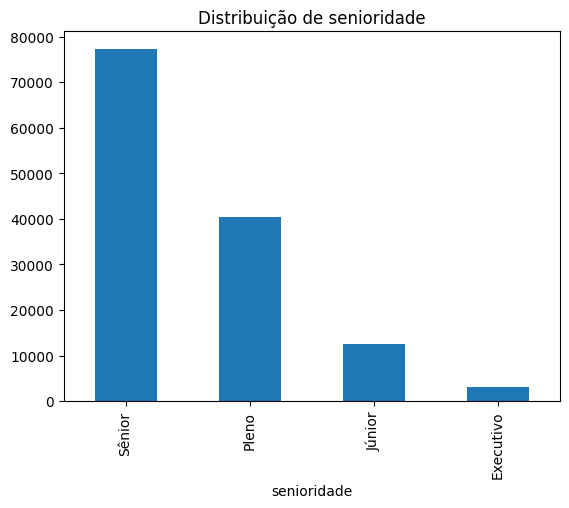

In [ ]:
# monta um gráfico de barras com a contagem de cada tipo do campo senioridade
df_limpo["senioridade"].value_counts().plot(kind="bar", title="Distribuição de senioridade")

In [ ]:
"""Seaborn é uma biblioteca Python de visualização de dados de alto nível baseada em Matplotlib, focada na criação de gráficos estatísticos atraentes e informativos com menos código.
Ela se integra facilmente com DataFrames do Pandas, oferecendo temas predefinidos, paletas de cores sofisticadas e funções para visualizar distribuições, relacionamentos e dados categóricos."""
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

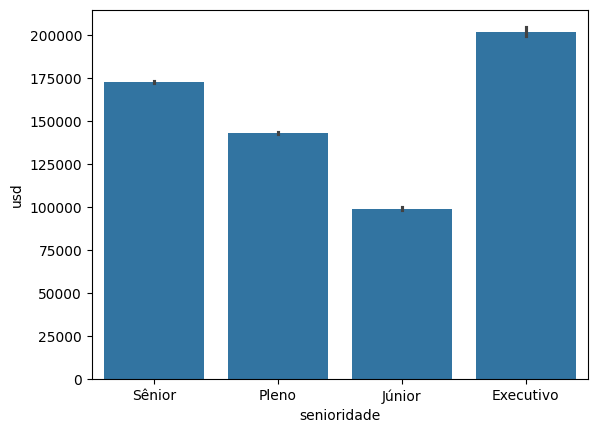

In [ ]:
# cria um gráfico de barra comparando senioridade x salário em dólares
sns.barplot(data=df_limpo, x="senioridade", y="usd")

In [ ]:
"""matplotlib.pyplot é um módulo da biblioteca Matplotlib que fornece uma interface procedural, semelhante ao MATLAB, para criar gráficos e visualizações de dados em Python de forma rápida e simples.
Ele gerencia automaticamente elementos como figuras e eixos para plotar dados, sendo amplamente utilizado para análise exploratória e gráficos interativos."""
import matplotlib.pyplot as plt

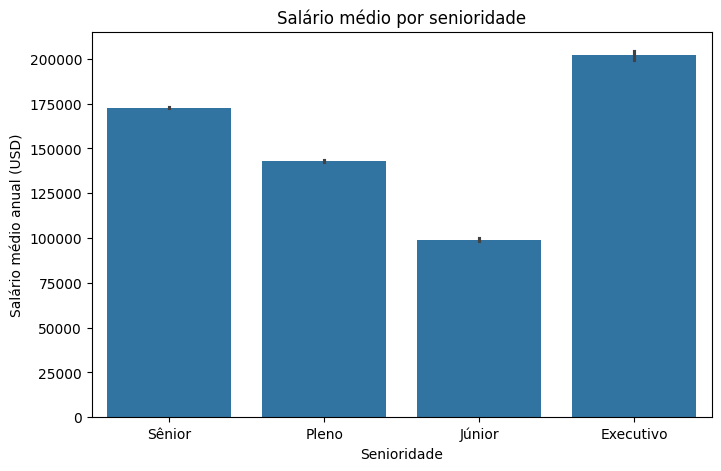

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")

plt.show()

In [ ]:
# Agrupa e ordena pelo valor do maior para o menor
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='object', name='senioridade')

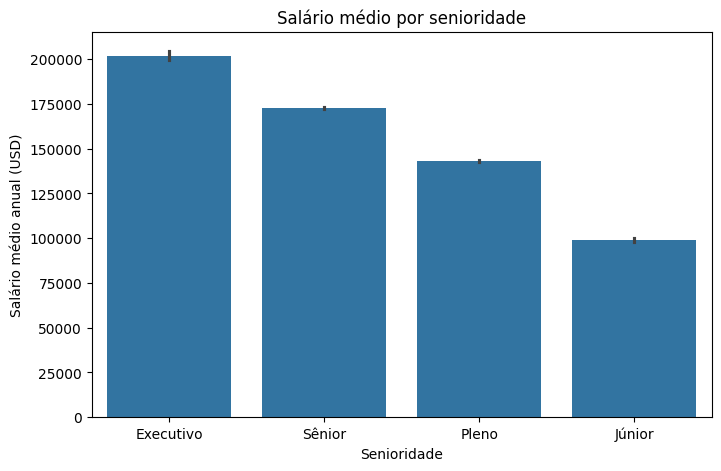

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x="senioridade", y="usd", order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")

plt.show()

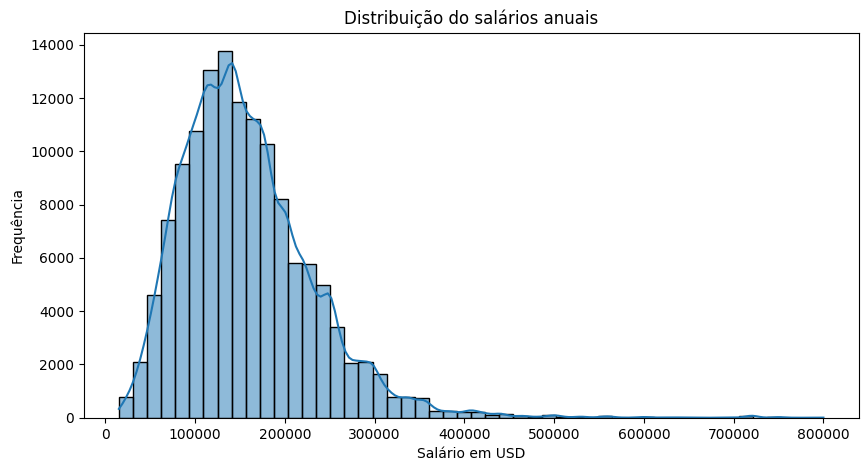

In [ ]:
plt.figure(figsize=(10, 5))
# bins = granularidade das barras; kde = linha que acompanha as barras
sns.histplot(df_limpo["usd"], bins=50, kde=True)
plt.title("Distribuição do salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")

plt.show()

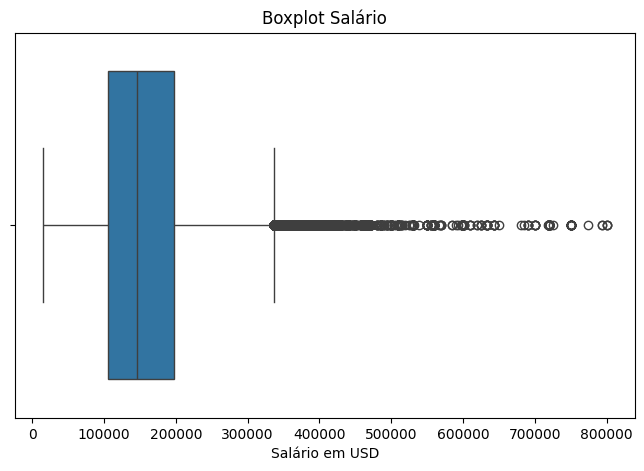

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_limpo["usd"])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")

plt.show()

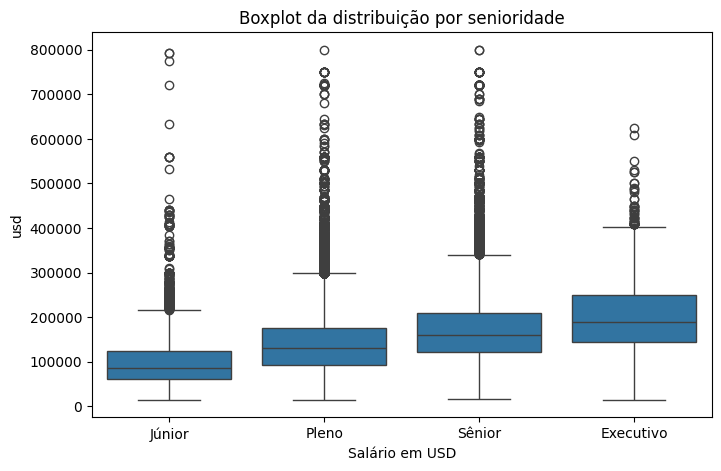

In [ ]:
ordem_senioridade = ["Júnior", "Pleno", "Sênior", "Executivo"]

plt.figure(figsize=(8, 5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")

plt.show()

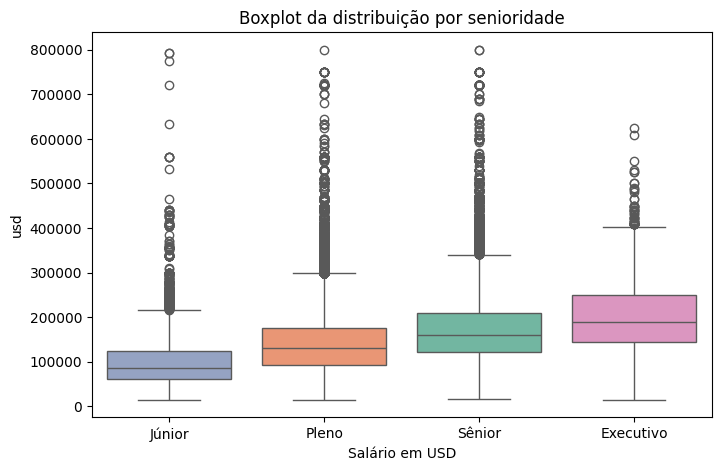

In [ ]:
ordem_senioridade = ["Júnior", "Pleno", "Sênior", "Executivo"]

plt.figure(figsize=(8, 5))
# cores diferentes para as diferentes senioridades
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade, palette="Set2", hue="senioridade")
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")

plt.show()

In [ ]:
""" É uma biblioteca de alto nível para Python, parte do ecossistema Plotly, projetada para criar gráficos interativos, complexos e visualmente atraentes com apenas uma linha de código.
Ela facilita a visualização de dados ao se integrar nativamente com Pandas DataFrames, sendo ideal para análises rápidas, exploração de dados e criação de Dashboards interativos."""
import plotly.express as px

In [ ]:
# Crie um gráfico de média salarial por senioridade em barras usando o plotly

df_salario_senioridade = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

# Reutilizando a ordem definida anteriormente para a senioridade
ordem_senioridade = ["Júnior", "Pleno", "Sênior", "Executivo"]
df_salario_senioridade['senioridade'] = pd.Categorical(df_salario_senioridade['senioridade'], categories=ordem_senioridade, ordered=True)
df_salario_senioridade = df_salario_senioridade.sort_values('senioridade')

fig = px.bar(
    df_salario_senioridade,
    x='senioridade',
    y='usd',
    title='Média Salarial por Nível de Senioridade',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial (USD)'},
    color='senioridade',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()

In [ ]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
    names="tipo_trabalho",
    values="quantidade",
    title="Proporção dos Tipos de Trabalho"
)

fig.show()

In [ ]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
    names="tipo_trabalho",
    values="quantidade",
    title="Proporção dos Tipos de Trabalho",
   hole=0.5
)

fig.show()

In [ ]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

fig = px.pie(remoto_contagem,
    names="tipo_trabalho",
    values="quantidade",
    title="Proporção dos Tipos de Trabalho",
   hole=0.5
)

fig.update_traces(textinfo='percent+label')
fig.show()

In [ ]:
# DESAFIO
"""
Gerar uma visualização com plotly de salário médio por país do cargo cientista de dados/data scientist
"""

'\nGerar uma visualização com plotly de salário médio por país do cargo cientista de dados/data scientist\n'

In [ ]:
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

df_salario_por_pais = df_data_scientist.groupby('empresa')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    df_salario_por_pais,
    x='empresa',
    y='usd',
    title='Salário Médio de Cientista de Dados por País',
    labels={'empresa': 'País da Empresa', 'usd': 'Média Salarial (USD)'},
    color='empresa',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(xaxis_title_text='País da Empresa', yaxis_title_text='Salário Médio Anual (USD)')
fig.show()

# Aula 04 - Construa um Dashboard com Streamlit

In [ ]:
# No VsCode

In [ ]:
pip install pycountry

  Using cached pycountry-24.6.1-py3-none-any.whl.metadata (12 kB)
Using cached pycountry-24.6.1-py3-none-any.whl (6.3 MB)


In [ ]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média,USA
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média,AUS
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média,USA


In [ ]:
df_limpo.to_csv("dados-imersao.csv", index=False)